In [1]:
import os
import sys
import torch
import matplotlib.pyplot as plt
import numpy as np

In [2]:
current_directory = os.getcwd()
model_path = os.path.join(os.path.dirname(current_directory), 'model')
sys.path.insert(0, model_path)

## Testing Functions

In [3]:
import np_functions
import torch_functions


In [4]:
x = torch.randn(100000)

In [4]:
a1,b1 = torch_functions.f_b_sigmoid(x,1)
a2,b2 = torch_functions.f_b_tanh(x)
a3,b3 = torch_functions.f_b_relu(x)

In [5]:
%%timeit
a1,b1 = torch_functions.f_b_sigmoid(x,1)
a2,b2 = torch_functions.f_b_tanh(x)
a3,b3 = torch_functions.f_b_relu(x)

1.77 ms ± 242 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [6]:
x = x.numpy()

In [7]:
p1,q1 = np_functions.f_b_sigmoid(x,1)
p2,q2 = np_functions.f_b_tanh(x)
p3,q3 = np_functions.f_b_relu(x)

In [8]:
%%timeit
p1,q1 = np_functions.f_b_sigmoid(x,1)
p2,q2 = np_functions.f_b_tanh(x)
p3,q3 = np_functions.f_b_relu(x)

1.51 ms ± 60 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [9]:
([int(ele) for ele in a1] == [int(ele) for ele in p1] and
[int(ele) for ele in a2] == [int(ele) for ele in p2] and
[int(ele) for ele in a3] == [int(ele) for ele in p3] and
[int(ele) for ele in b1] == [int(ele) for ele in q1] and
[int(ele) for ele in b2] == [int(ele) for ele in q2] and 
[int(ele) for ele in b3] == [int(ele) for ele in q3])

True

## Testing Loss

In [5]:
import np_loss
import torch_loss

In [11]:
y = np.random.randn(100000)
f = np.random.randn(100000)

In [12]:
npl1 = np_loss.MSE_error(y,f)
npl2 = np_loss.RMS_error(y,f)

In [13]:
%%timeit
npl1 = np_loss.MSE_error(y,f)
npl2 = np_loss.RMS_error(y,f)

191 µs ± 7.42 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [14]:
y = torch.from_numpy(y)
f = torch.from_numpy(f)

In [15]:
tl1 = torch_loss.MSE_error(y,f)
tl2 = torch_loss.RMS_error(y,f)

In [16]:
%%timeit
tl1 = torch_loss.MSE_error(y,f)
tl2 = torch_loss.RMS_error(y,f)

334 µs ± 85.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [17]:
(int(tl1) == int(tl1) and int(npl2) == int(tl2))

True

## Testing Init

In [6]:
import np_init
import torch_init

In [19]:
%%timeit
for i in range(100000):
    w,b = np_init.initializer([3,2,1], "xavier")
    w,b = np_init.initializer([3,2,1], "he")
    w,b = np_init.initializer([3,2,1], "std_gaussian")
    w,b = np_init.initializer([3,2,1], "uniform")

2.69 s ± 22.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [20]:
%%timeit
for i in range(100000):
    w,b = torch_init.initializer([3,2,1], "xavier")
    w,b = torch_init.initializer([3,2,1], "he")
    w,b = torch_init.initializer([3,2,1], "std_gaussian")
    w,b = torch_init.initializer([3,2,1], "uniform")

7.05 s ± 112 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Testing Inference

In [7]:
import np_infer
import torch_infer


In [26]:
parameters = {
    "itr":100, #this is the number of iterations
    "l_rate":0.2, #this is the learning rate
    "epochs":500, #this is the total number of epochs
    "beta":0.2, #[TODO]
    "act_type": "RELU",
    "alpha": 1, #hyperparam for sigmoid activation
    "neurons": [2,3,1], #this basically says two nodes for input, 5 in hidden and 1 for the output
    "variance": [1,1,10] #this defines varaince for each layer, 1 for all layers but 10 for last, why though? [TODO]
}
parameters["n_layers"] = (len(parameters["neurons"]) ) #basically how many layers we have + 1

In [30]:
in_data = np.array([[0,0],[0,1],[1,0],[1,1]])
out_data = np.array([1,0,0,1])

n_layers = parameters["n_layers"]
act_type =  parameters["act_type"]
alpha =  parameters["alpha"]

w,b = np_init.initializer(parameters["neurons"], "xavier")

x = [None] * n_layers
x[0] = np.array(in_data[1]).reshape(1,-1)
x_out = np.array(out_data[1]).reshape(1,-1)
for j in range(1,n_layers):
    x[j] = (np_functions.f(x[j-1].reshape(1,-1), act_type, alpha) @ w[j-1].T ) + b[j-1].T
x[-1]  = np.array(x_out)

params = parameters


In [34]:
_, _ = np_infer.infer(x,w,b,parameters)


In [35]:
%%timeit
np_infer.infer(x,w,b,parameters)

2.47 ms ± 9.41 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [36]:
in_data = torch.tensor([[0,0],[0,1],[1,0],[1,1]], dtype=torch.float32)
out_data = torch.tensor([1,0,0,1], dtype=torch.float32)

n_layers = parameters["n_layers"]
act_type =  parameters["act_type"]
alpha =  parameters["alpha"]

w,b = torch_init.initializer(parameters["neurons"], "xavier")

x = [None] * n_layers
x[0] = in_data[0].reshape(1,-1)
x_out = out_data[0].reshape(1,-1)
for j in range(1,n_layers):
    x[j] = (torch_functions.f(x[j-1].reshape(1,-1), act_type, alpha) @ w[j-1].T ) + b[j-1].T
x[-1]  = x_out

params = parameters


In [37]:
_, _ = torch_infer.infer(x,w,b,parameters)


In [38]:
%%timeit
torch_infer.infer(x,w,b,parameters)

7.52 ms ± 61.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# testing Learning:

In [28]:
import np_learn
import torch_learn

In [15]:
parameters = {
    "itr":100, #this is the number of iterations
    "l_rate":0.2, #this is the learning rate
    "epochs":500, #this is the total number of epochs
    "beta":0.2, #[TODO]
    "act_type": "RELU",
    "alpha": 1, #hyperparam for sigmoid activation
    "neurons": [2,3,1], #this basically says two nodes for input, 5 in hidden and 1 for the output
    "variance": [1,1,10] #this defines varaince for each layer, 1 for all layers but 10 for last, why though? [TODO]
}
parameters["n_layers"] = (len(parameters["neurons"]) ) #basically how many layers we have + 1

In [16]:
in_data = np.array([[0,0],[0,1],[1,0],[1,1]])
out_data = np.array([1,0,0,1])
w,b = np_init.initializer(parameters["neurons"], "xavier")

In [26]:
import np_forward
import torch_forward

TypeError: mean() received an invalid combination of arguments - got (out=NoneType, dtype=NoneType, axis=NoneType, ), but expected one of:
 * (*, torch.dtype dtype)
 * (tuple of ints dim, bool keepdim, *, torch.dtype dtype)
 * (tuple of names dim, bool keepdim, *, torch.dtype dtype)


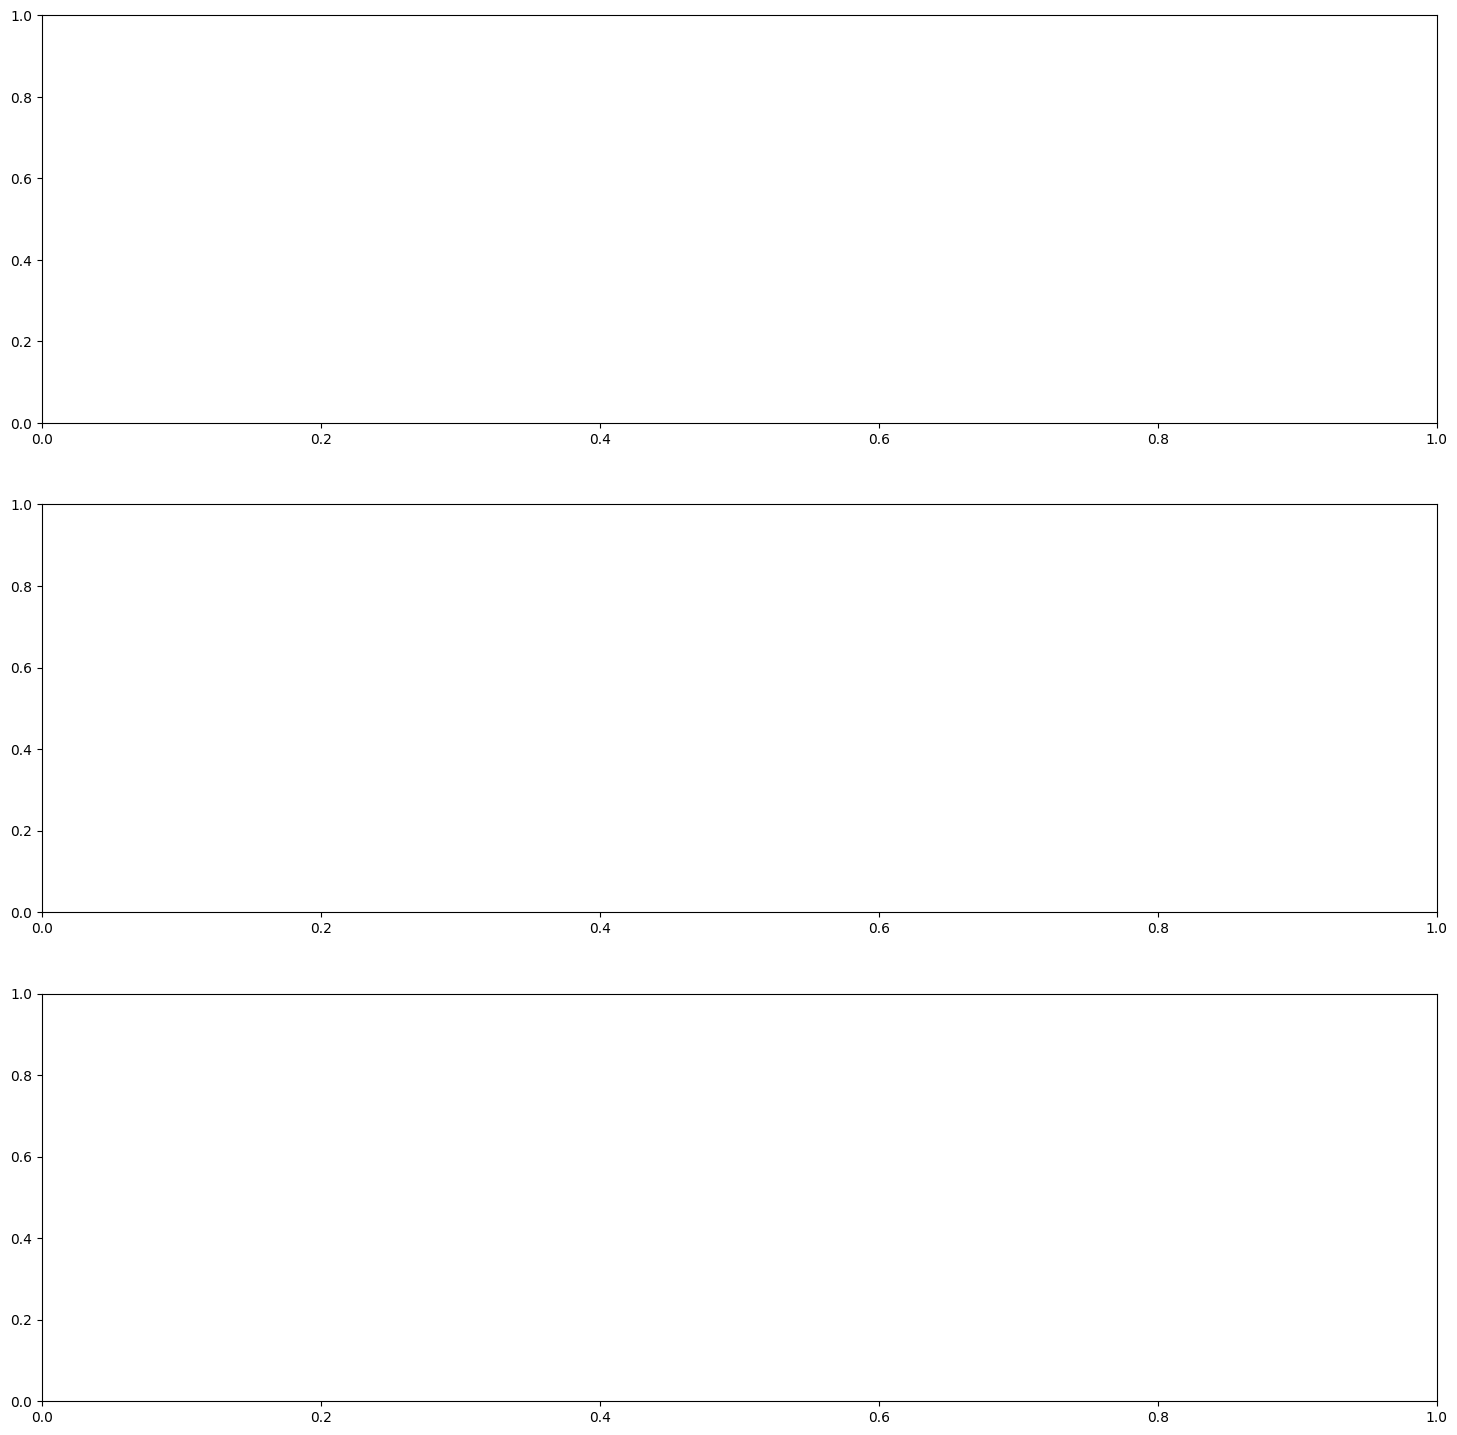

In [34]:
activations = ["SIGMOID", "TANH", "RELU"]
err_arrs = [None] * len(activations)

fig, axs = plt.subplots(len(activations), 1, figsize=(18, 18))

for j in range(len(activations)):
  err_arr = []
  parameters["act_type"] = activations[j]
  if (activations[j] == "TANH") or (activations[j] == "SIGMOID"):
    w, b = np_init.initializer(parameters["neurons"], "xavier")
  if (activations[j] == "RELU"):
    w, b = np_init.initializer(parameters["neurons"], "he")
  for i in range(500):
    np_learn.learn(in_data,out_data, w ,b, parameters)
    predicted = []
    for data in in_data:
        pred = np_forward.predict(np.array(data), w, b, parameters["n_layers"],parameters["act_type"],parameters["alpha"])
        predicted.append(pred)

    predicted = np.array(predicted)
    rmse = np_loss.RMS_error(out_data, predicted)
    err_arr.append(rmse)
  err_arrs[j] = err_arr
  axs[j].plot(err_arrs[j], marker='o', linestyle='-')
  axs[j].set_title(f'RMSE Values Over Iterations for {activations[j]}')
  axs[j].set_xlabel('Iteration')
  axs[j].set_ylabel('RMSE')
  axs[j].grid(True)
plt.tight_layout()
plt.show()

In [31]:
in_data = torch.tensor([[0,0],[0,1],[1,0],[1,1]], dtype=torch.float32)
out_data = torch.tensor([1,0,0,1], dtype=torch.float32)
w,b = torch_init.initializer(parameters["neurons"], "xavier")

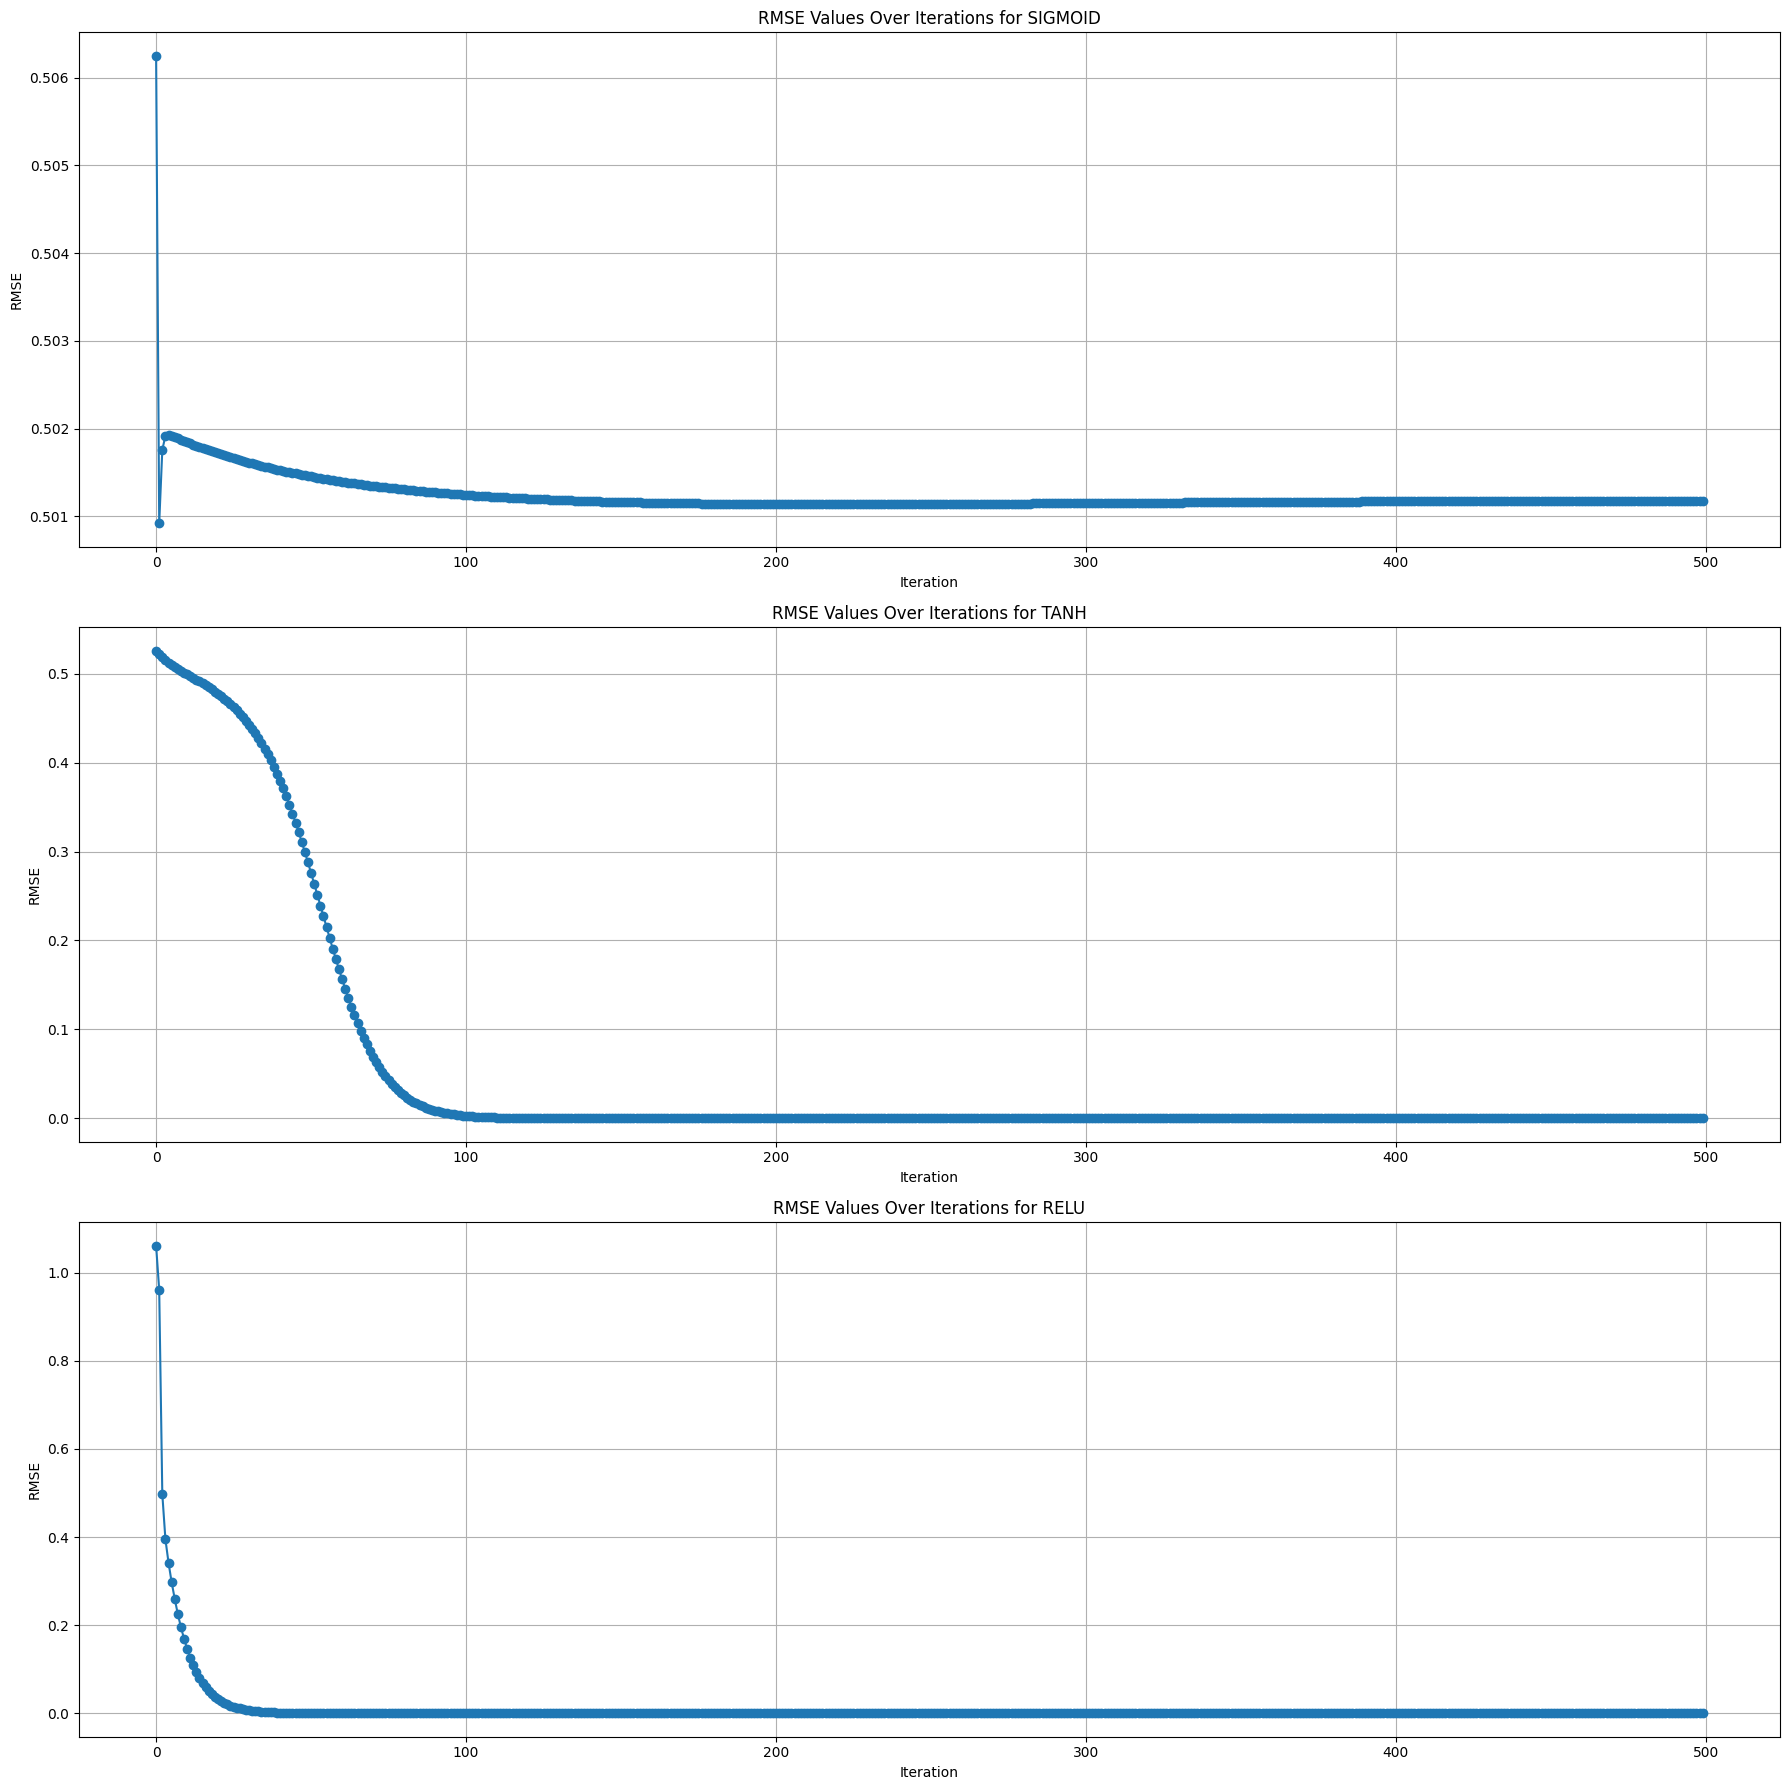

In [32]:
activations = ["SIGMOID", "TANH", "RELU"]
err_arrs = [None] * len(activations)

fig, axs = plt.subplots(len(activations), 1, figsize=(18, 18))

for j in range(len(activations)):
  err_arr = []
  parameters["act_type"] = activations[j]
  if (activations[j] == "TANH") or (activations[j] == "SIGMOID"):
    w, b = torch_init.initializer(parameters["neurons"], "xavier")
  if (activations[j] == "RELU"):
    w, b = torch_init.initializer(parameters["neurons"], "he")
  for i in range(500):
    torch_learn.learn(in_data,out_data, w ,b, parameters)
    predicted = []
    for data in in_data:
        pred = torch_forward.predict(data, w, b, parameters["n_layers"],parameters["act_type"],parameters["alpha"])
        predicted.append(pred)

    predicted = torch.tensor(predicted)
    rmse = torch_loss.RMS_error(out_data, predicted)
    err_arr.append(rmse)
  err_arrs[j] = err_arr
  new_arr = [num.item() for num in err_arrs[j]]
  axs[j].plot(new_arr, marker='o', linestyle='-')
  axs[j].set_title(f'RMSE Values Over Iterations for {activations[j]}')
  axs[j].set_xlabel('Iteration')
  axs[j].set_ylabel('RMSE')
  axs[j].grid(True)
plt.tight_layout()
plt.show()